In [ ]:
pip install modin

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
pip install tensorflow==2.9.1

In [2]:
#from google.colab import files 
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import preprocessing

In [ ]:
tf.version.VERSION

In [ ]:
files.upload()

In [ ]:
from distributed import Client
client = Client()

In [3]:
#upload file
#data = pd.read_csv('/content/data_orient10.csv')
data = pd.read_csv('/home/sofia/SOFIA_Python/data/Data_2022/data_september/data_orient10.csv')
#data = shuffle(data)
data.shape

(28800, 5)

In [ ]:
data

In [ ]:
profile = data.profile_report(title = 'Neck Report')
profile.to_file("Analysis.html")

In [ ]:
a=0;b=0;c=0;d=0;e=0
data_a=[]
for i in range(0,288,1):
  for j in range(0,100,1):
      a = (data.iloc[j+(i*100),0]+a)/2
      b = (data.iloc[j+(i*100),1]+b)/2
      c = (data.iloc[j+(i*100),2]+c)/2
      d = (data.iloc[j+(i*100),3]+d)/2
      e = (data.iloc[j+(i*100),4]+e)/2
  data_a.append([a,b,c,d,e])
print(len(data_a))

In [ ]:
df = pd.DataFrame(data_a)
df.columns = ['Inclination', 'Orientation', 'M1', 'M2', 'M3']

In [ ]:
df

In [4]:
import sklearn.utils 
data = sklearn.utils.shuffle(data) #aleatorizamos los datos

In [5]:
#separate data in train and test 
from sklearn.model_selection import train_test_split
X = data.iloc[:,:2]
y = data.iloc[:,2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#normalize the data 
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train.astype('float32'))
X_test = scaler.fit_transform(X_test.astype('float32'))
print('Training dataset (input) shape: ', format(X_train.shape))
print('Test dataset (output) shape: ', format(y_test.shape))

## 2. Arquitecture #2 (TANH)

---




Funciones de activación: Tanh
Capas: 10
Neuronas: Numero fijo (25)
epochs: 100

In [26]:
neuronas=25

h_layer_1 = tf.keras.layers.Dense(units=neuronas, input_shape=[2], activation=tf.nn.tanh)
h_layer_2 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_3 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_4 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_5 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_6 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_7 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_8 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_9 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_10 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
output = tf.keras.layers.Dense(units=3, activation=tf.nn.relu)
model_2 = tf.keras.Sequential([h_layer_1, h_layer_2, h_layer_3, h_layer_4, h_layer_5, h_layer_6, h_layer_7, h_layer_8, h_layer_9, h_layer_10,
                             output])

In [27]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

In [28]:
print("Initializing training ...")
trained_model_2 = model_2.fit(X_train, y_train, epochs=15) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

Initializing training ...
Epoch 1/15
630/630 [==============================] - 1s 725us/step - loss: 0.2846 - accuracy: 0.5803
Epoch 2/15
630/630 [==============================] - 0s 675us/step - loss: 0.2145 - accuracy: 0.6462
Epoch 3/15
630/630 [==============================] - 0s 703us/step - loss: 0.1361 - accuracy: 0.7779
Epoch 4/15
630/630 [==============================] - 0s 687us/step - loss: 0.0227 - accuracy: 0.9758
Epoch 5/15
630/630 [==============================] - 0s 693us/step - loss: 0.0230 - accuracy: 0.9717
Epoch 6/15
630/630 [==============================] - 0s 724us/step - loss: 0.0191 - accuracy: 0.9803
Epoch 7/15
630/630 [==============================] - 0s 724us/step - loss: 0.0190 - accuracy: 0.9820
Epoch 8/15
630/630 [==============================] - 0s 689us/step - loss: 0.0238 - accuracy: 0.9713
Epoch 9/15
630/630 [==============================] - 0s 718us/step - loss: 0.0170 - accuracy: 0.9870
Epoch 10/15
630/630 [==============================] - 0

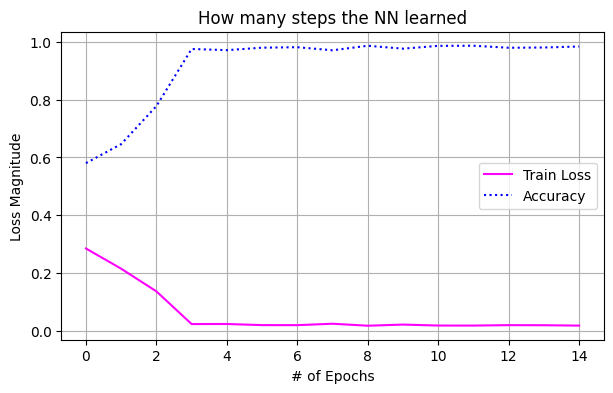

In [29]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [ ]:
#Test model using testing dataset
test_loss, test_accuracy = model_2.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

In [30]:
pred = []
for inclination in range(1,35,5):
  for orientation in range(1,361,10):
      #print("Let's make a prediction in orietation")
      prediction = model_2.predict([[inclination,orientation]], verbose=False)
      prediction_1 = prediction.flatten().tolist()
      pred.append(prediction_1)

print(pred)
#model_8.summary()

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.06935647875070572], [0.0, 0.0, 0.13970232009887695], [0.0, 0.0, 0.19233165681362152], [0.0, 0.0, 0.22979415953159332], [0.006647463887929916, 0.0, 0.25048351287841797], [0.07980851083993912, 0.0, 0.2519991397857666], [0.15744294226169586, 0.0, 0.2319188266992569], [0.23648905754089355, 0.0, 0.1887202113866806], [0.3130623400211334, 0.0, 0.12303196638822556], [0.3833138048648834, 0.0, 0.03831993415951729], [0.444265216588974, 0.0, 0.0], [0.4941387474536896, 0.0, 0.0], [0.5321362614631653, 0.0, 0.0], [0.5580768585205078, 0.0, 0.0], [0.5722265839576721, 0.0, 0.0], [0.5753083229064941, 0.0, 0.0], [0.5684929490089417, 0.0, 0.0], [0.5532336831092834, 0.0, 0.0], [0.5309852957725525, 0.0, 0.0], [0.5029247403144836, 0.0, 0.0], [0.46978914737701416, 0.0, 0.0], [0.43184202909469604, 0.0, 0.0], [0.38895514607429504, 0.043977539986371994, 0.0], [0.3407423794269562, 0.10577107220888138, 0.0], [0.2866996228694916, 0.1615695357322693, 0.0], [0.2263165563

In [31]:
columns = ['Pred-M1', 'Pred-M2','Pred-M3']
dataset_pred = pd.DataFrame(pred, columns = columns)


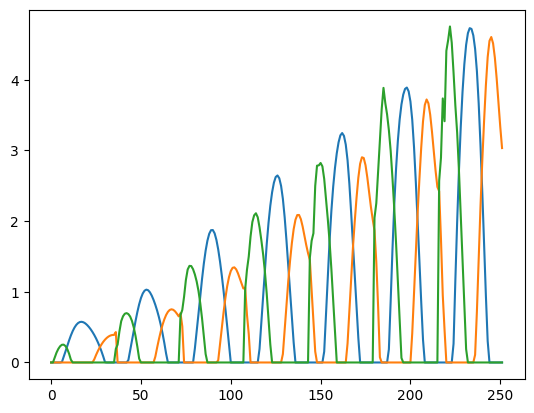

In [32]:
plt.plot(dataset_pred['Pred-M1'])
plt.plot(dataset_pred['Pred-M2'])
plt.plot(dataset_pred['Pred-M3'])

In [ ]:
#cinematica directa
L0 = 0.107 #m longitud comprimida
radio=0.005; #m radio del acople giratorio
a=0.05; #m distancia al centro
a_orient=[]
a_incli=[]
for i in range(0, len(pred), 1):#tamño de dataset dataset_pred
  L1=L0-(dataset_pred.iat[(i),0]*radio);
  L2=L0-(dataset_pred.iat[(i),1]*radio);
  L3=L0-(dataset_pred.iat[(i),2]*radio);
  orient = math.atan((L2+L3-2*L1)/(math.sqrt(3)*(L2-L3)))
  if ((L2+L3-2*L1)==(3*(L2-L3))):
    orient=0;
  elif((L2+L3-2*L1)>=0 and (math.sqrt(3)*(L2-L3))<=0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))<0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))>0):
    orient=orient+2*math.pi;
  orient=math.degrees(orient);
  a_orient.append(orient)
  incli=math.degrees(2*math.asin((L2-L3)/(2*math.sqrt(3)*a*math.cos(math.radians(orient)))));
  a_incli.append(incli)

In [ ]:
#nube de puntos
OPo_x = []
OPo_y = []
OPo_z = []

for i in range(0, len(pred), 1):
  s0_number = L0*(1-math.cos(math.radians(a_incli[i])))/math.radians(a_incli[i])
  t0_number = L0*math.sin(math.radians(a_incli[i]))/math.radians(a_incli[i])

  OPo_x_num = s0_number*math.cos(math.radians(a_orient[i]))
  OPo_y_num = s0_number*math.sin(math.radians(a_orient[i]))
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text("Neck Workspace - MLP")


ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim3d(-0.04, 0.04)
ax1.set_ylim3d(-0.04, 0.04)
ax1.set_zlim3d(0.097, 0.105)

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')
ax1.grid(linewidth=0.5)


# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

In [33]:
# Saving the model
import joblib  
joblib.dump(model_2, 'trained_model2_v2tanh.pkl') 

INFO:tensorflow:Assets written to: ram://e4638c6e-f421-43c9-9285-a0f070750388/assets


INFO:tensorflow:Assets written to: ram://e4638c6e-f421-43c9-9285-a0f070750388/assets


['trained_model2_v2tanh.pkl']

In [34]:
df_10 = pd.read_csv('/home/sofia/SOFIA_Python/ml/TFM/data_model12_v2tanh_Predictions.csv')
print(df_10)

       Inclination  Orientation        M1        M2        M3
0         4.822106    89.918346 -0.000383  0.004730  0.006647
1         3.012571    72.113384 -0.000256  0.028123  0.027995
2         2.201355    44.661475  0.000256  0.063405  0.040778
3         2.313187    33.583082  0.000895  0.115688  0.041034
4         2.637052    28.674933 -0.001150  0.180626  0.039500
...            ...          ...       ...       ...       ...
25195    12.779260   309.482561 -0.003324  2.368850  0.002429
25196    12.796897   309.853171 -0.002557  2.368850  0.002557
25197    12.790077   309.876039  0.001406  2.368850  0.002429
25198    12.767699   309.839966  0.002429  2.368850  0.001917
25199    12.747404   309.783375  0.002429  2.368850 -0.003835

[25200 rows x 5 columns]


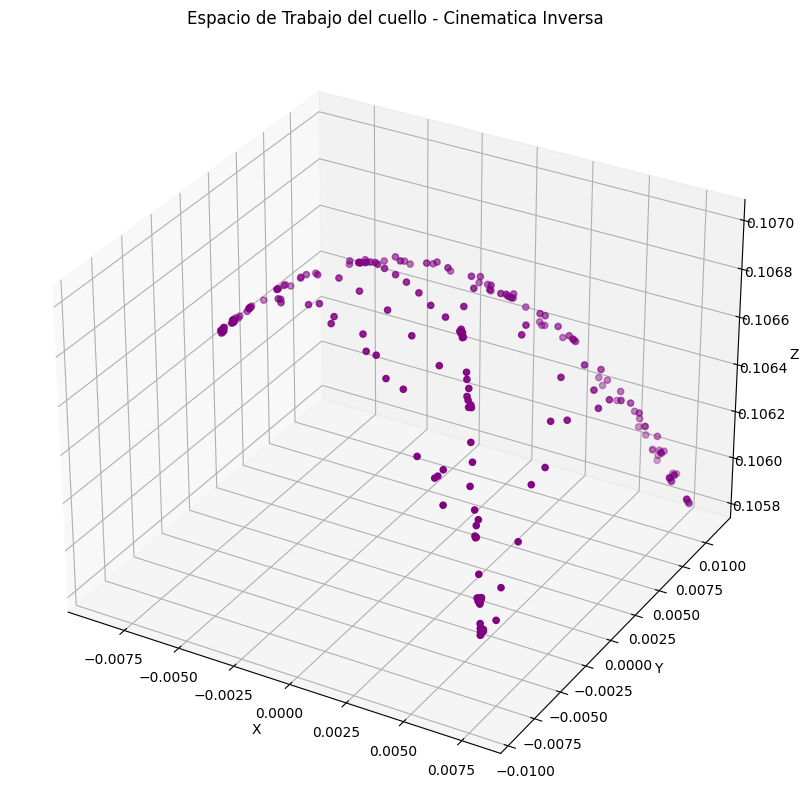

In [35]:
#contantes
L0 = 0.107 #m longitud comprimida

OPo_x = []
OPo_y = []
OPo_z = []


for i in range(1, 252, 1):
  the_number = math.radians(df_10.iat[(i*100)-1,0])
  psi_number = math.radians(df_10.iat[(i*100)-1,1])
  s0_number = L0*(1-math.cos(the_number))/the_number
  t0_number = L0*math.sin(the_number)/the_number

  OPo_x_num = s0_number*math.cos(psi_number)
  OPo_y_num = s0_number*math.sin(psi_number)
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)


#Plot Inverse Kinematics
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 10))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text('Espacio de Trabajo del cuello - Cinematica Inversa')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='purple', marker='o')

# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

## 2. Arquitecture #2 (TANH) drop out


Funciones de activación: Tanh
Capas: 10
Neuronas: Numero fijo (25)
epochs: 100

In [ ]:
neuronas=10
model_3 = tf.keras.Sequential()

model_3.add(tf.keras.layers.Dense(units=neuronas, input_shape=[2], activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
#model_3.add(tf.keras.layers.Dropout(0.1))

model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
#model_3.add(tf.keras.layers.Dropout(0.1))

model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
#model_3.add(tf.keras.layers.Dropout(0.1))

model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
#model_3.add(tf.keras.layers.Dropout(0.1))

model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
model_3.add(tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh))
#model_3.add(tf.keras.layers.Dropout(0.4))

model_3.add(tf.keras.layers.Dense(units=3, activation=tf.nn.tanh))


In [ ]:
model_3.summary()

In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

In [ ]:
print("Initializing training ...")
trained_model_3 = model_3.fit(X_train, y_train, epochs=4) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

In [ ]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_3.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_3.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [ ]:
#Test model using testing dataset
test_loss, test_accuracy = model_3.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

In [ ]:
pred = []
for inclination in range(1,35,5):
  for orientation in range(1,361,10):
      #print("Let's make a prediction in orietation")
      prediction = model_3.predict([[inclination,orientation]], verbose=False)
      prediction_1 = prediction.flatten().tolist()
      pred.append(prediction_1)

print(pred)
#model_8.summary()

In [ ]:
columns = ['Pred-M1', 'Pred-M2','Pred-M3']
dataset_pred = pd.DataFrame(pred, columns = columns)


In [ ]:
plt.plot(dataset_pred['Pred-M1'])
#plt.plot(dataset_pred['Pred-M2'])
#plt.plot(dataset_pred['Pred-M3'])

In [ ]:
#cinematica directa
L0 = 0.107 #m longitud comprimida
radio=0.005; #m radio del acople giratorio
a=0.05; #m distancia al centro
a_orient=[]
a_incli=[]
for i in range(0, len(pred), 1):#tamño de dataset dataset_pred
  L1=L0-(dataset_pred.iat[(i),0]*radio);
  L2=L0-(dataset_pred.iat[(i),1]*radio);
  L3=L0-(dataset_pred.iat[(i),2]*radio);
  orient = math.atan((L2+L3-2*L1)/(math.sqrt(3)*(L2-L3)))
  if ((L2+L3-2*L1)==(3*(L2-L3))):
    orient=0;
  elif((L2+L3-2*L1)>=0 and (math.sqrt(3)*(L2-L3))<=0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))<0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))>0):
    orient=orient+2*math.pi;
  orient=math.degrees(orient);
  a_orient.append(orient)
  incli=math.degrees(2*math.asin((L2-L3)/(2*math.sqrt(3)*a*math.cos(math.radians(orient)))));
  a_incli.append(incli)

In [ ]:
#nube de puntos
OPo_x = []
OPo_y = []
OPo_z = []

for i in range(0, len(pred), 1):
  s0_number = L0*(1-math.cos(math.radians(a_incli[i])))/math.radians(a_incli[i])
  t0_number = L0*math.sin(math.radians(a_incli[i]))/math.radians(a_incli[i])

  OPo_x_num = s0_number*math.cos(math.radians(a_orient[i]))
  OPo_y_num = s0_number*math.sin(math.radians(a_orient[i]))
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text("Neck Workspace - MLP")


ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim3d(-0.04, 0.04)
ax1.set_ylim3d(-0.04, 0.04)
ax1.set_zlim3d(0.097, 0.105)

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')
ax1.grid(linewidth=0.5)


# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

In [ ]:
# Saving the model
import joblib  
joblib.dump(model_2, 'trained_model2_v2.pkl') 

## 17. Arquitecture #17 (Elu)


Funciones de activación: Elu
Capas: 10
Neuronas: Numero fijo (25)
epochs: 100

In [6]:
h_layer_1 = tf.keras.layers.Dense(units=25, input_shape=[2], activation=tf.nn.elu)
h_layer_2 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_3 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_4 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_5 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_6 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_7 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_8 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_9 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_10 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
output = tf.keras.layers.Dense(units=3)
model_17 = tf.keras.Sequential([h_layer_1, h_layer_2, h_layer_3, h_layer_4, h_layer_5, h_layer_6, h_layer_7, h_layer_8, h_layer_9, h_layer_10,
                             output])

2023-05-16 17:10:29.362308: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [7]:
model_17.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

In [21]:
print("Initializing training ...")
trained_model_17 = model_17.fit(X_train, y_train, epochs=5) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

Initializing training ...
Epoch 1/5
630/630 [==============================] - 0s 677us/step - loss: 0.0142 - accuracy: 0.9982
Epoch 2/5
630/630 [==============================] - 0s 690us/step - loss: 0.0142 - accuracy: 0.9982
Epoch 3/5
630/630 [==============================] - 0s 699us/step - loss: 0.0143 - accuracy: 0.9969
Epoch 4/5
630/630 [==============================] - 0s 703us/step - loss: 0.0144 - accuracy: 0.9976
Epoch 5/5
630/630 [==============================] - 0s 691us/step - loss: 0.0149 - accuracy: 0.9957
Succesfully trained


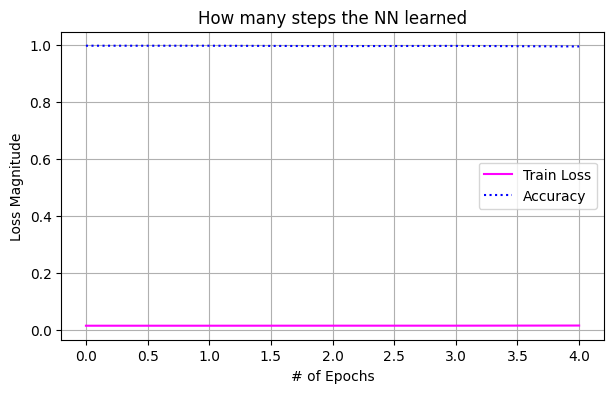

In [22]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_17.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_17.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [16]:
#Test model using testing dataset
test_loss, test_accuracy=model_17.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

270/270 [==============================] - 0s 523us/step - loss: 0.0129 - accuracy: 0.9981
Test Dataset accuracy: 1.0


In [ ]:
# Saving the model
import joblib  
joblib.dump(model_17, 'trained_2.pkl') 

In [23]:
pred2 = []
for inclination in range(1,35,5):
  for orientation in range(1,361,10):
      #print("Let's make a prediction in orietation")
      prediction = model_17.predict([[inclination,orientation]], verbose=False)
      prediction_1 = prediction.flatten().tolist()
      pred2.append(prediction_1)

print(pred2)
#model_8.summary()

[[-0.09392203390598297, 0.30739232897758484, -0.09457829594612122], [0.10303221642971039, 0.100415900349617, 0.2767154276371002], [0.09669019281864166, 0.05636325851082802, 0.22241073846817017], [0.04118330031633377, 0.05570961534976959, 0.21476098895072937], [-0.009417405351996422, 0.06703589111566544, 0.23013420403003693], [0.015540000051259995, 0.05062972381711006, 0.2657090723514557], [0.09466879069805145, 0.019247233867645264, 0.2835603654384613], [0.17138932645320892, 0.0018749010050669312, 0.27093201875686646], [0.2508029341697693, -0.004735369700938463, 0.23803986608982086], [0.31097719073295593, -0.0017133934888988733, 0.19940701127052307], [0.3608882427215576, 0.007059775292873383, 0.15440170466899872], [0.4071083664894104, 0.015004514716565609, 0.10244361311197281], [0.4508242905139923, 0.013831480406224728, 0.05389285832643509], [0.4834808111190796, 0.0031611721497029066, 0.015034790150821209], [0.5105546116828918, -0.014975474216043949, -0.019193194806575775], [0.532350003

In [24]:
columns = ['Pred-M1', 'Pred-M2','Pred-M3']
dataset_pred = pd.DataFrame(pred2, columns = columns)


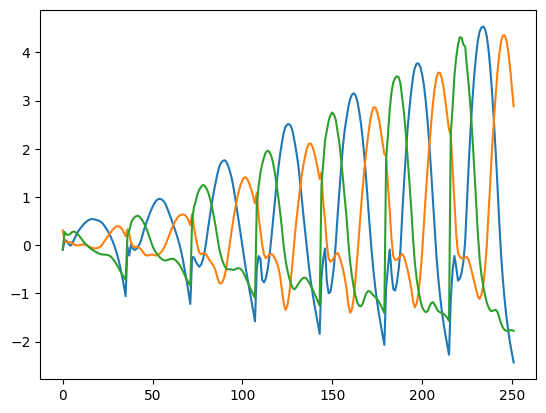

In [25]:
plt.plot(dataset_pred['Pred-M1'])
plt.plot(dataset_pred['Pred-M2'])
plt.plot(dataset_pred['Pred-M3'])

## 20. Arquitecture #20 (Elu)


Funciones de activación: Elu
Capas: 20
Neuronas: Numero fijo (25)
epochs: 100

In [ ]:

h_layer_1 = tf.keras.layers.Dense(units=25, input_shape=[2], activation=tf.nn.elu)
h_layer_2 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_3 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_4 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_5 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_6 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_7 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_8 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_9 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_10 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_11 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_12 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_13 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_14 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_15 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_16 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_17 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_18 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_19 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
h_layer_20 = tf.keras.layers.Dense(units=25, activation=tf.nn.elu)
output = tf.keras.layers.Dense(units=3)
model_20 = tf.keras.Sequential([h_layer_1, h_layer_2, h_layer_3, h_layer_4, h_layer_5, h_layer_6, h_layer_7, h_layer_8, h_layer_9, h_layer_10,
                               h_layer_11, h_layer_12, h_layer_13, h_layer_14, h_layer_15, h_layer_16, h_layer_17, h_layer_18, h_layer_19, h_layer_20,
                             output])

In [ ]:
model_20.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

In [ ]:
print("Initializing training ...")
trained_model_20 = model_20.fit(trainX, y_train, epochs=5) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

In [ ]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_20.history['loss'], color = 'darkviolet', label = 'Train Loss')
plt.plot(trained_model_17.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [ ]:
#Test model using testing dataset
test_loss, test_accuracy=model_20.evaluate(testX,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

In [ ]:
for i in range(0,360,10):
      #print("Let's make a prediction")
      prediction = model_20.predict([[i,15]])
      print("the result is: ", prediction)

#model_8.summary()

In [ ]:
# Saving the model
import joblib  
joblib.dump(model_20, 'trained_model20_reg_NN1.pkl') 

# Results of arquitecture with encoders

In [ ]:
files.upload()

In [ ]:
#upload file
#data = pd.read_csv('/content/data_orient10.csv')
data = pd.read_csv('data_model2_reg_NN1TAHN.csv')
#data = shuffle(data)
data.shape

In [ ]:
data

In [ ]:
#cinematica directa
L0 = 0.107 #m longitud comprimida
radio=0.005; #m radio del acople giratorio
a=0.05; #m distancia al centro
a_orient=[]
a_incli=[]
for i in range(0, 25200, 1):#tamño de dataset dataset_pred
  L1=L0-(data.iat[(i),2]*radio);
  L2=L0-(data.iat[(i),3]*radio);
  L3=L0-(data.iat[(i),4]*radio);
  orient = math.atan((L2+L3-2*L1)/(math.sqrt(3)*(L2-L3)))
  if ((L2+L3-2*L1)==(3*(L2-L3))):
    orient=0;
  elif((L2+L3-2*L1)>=0 and (math.sqrt(3)*(L2-L3))<=0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))<0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))>0):
    orient=orient+2*math.pi;
  orient=math.degrees(orient);
  a_orient.append(orient)
  incli=math.degrees(2*math.asin((L2-L3)/(2*math.sqrt(3)*a*math.cos(math.radians(orient)))));
  a_incli.append(incli)

In [ ]:
#nube de puntos
OPo_x = []
OPo_y = []
OPo_z = []

for i in range(0, 25200, 1):
  s0_number = L0*(1-math.cos(math.radians(a_incli[i])))/math.radians(a_incli[i])
  t0_number = L0*math.sin(math.radians(a_incli[i]))/math.radians(a_incli[i])

  OPo_x_num = s0_number*math.cos(math.radians(a_orient[i]))
  OPo_y_num = s0_number*math.sin(math.radians(a_orient[i]))
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text("Test of Arquitecture - Model 2")


ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim3d(-0.04, 0.04)
ax1.set_ylim3d(-0.04, 0.04)
ax1.set_zlim3d(0.097, 0.105)

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')
ax1.grid(linewidth=0.5)


# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

# Results of arquitecture with sensor

In [ ]:
files.upload()

In [ ]:
#upload file
#data = pd.read_csv('/content/data_orient10.csv')
data = pd.read_csv('data_model2_reg_NN1TAHN.csv')
#data = shuffle(data)
data.shape

In [ ]:
data

In [ ]:
#contantes
L0 = 0.107 #m longitud comprimida

OPo_x = []
OPo_y = []
OPo_z = []


for i in range(1, 252, 1):
  the_number = math.radians(data.iat[(i*100)-1,0])
  psi_number = math.radians(data.iat[(i*100)-1,1])
  s0_number = L0*(1-math.cos(the_number))/the_number
  t0_number = L0*math.sin(the_number)/the_number

  OPo_x_num = s0_number*math.cos(psi_number)
  OPo_y_num = s0_number*math.sin(psi_number)
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text("Test of Arquitecture - Model 2")


ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim3d(-0.04, 0.04)
ax1.set_ylim3d(-0.04, 0.04)
ax1.set_zlim3d(0.097, 0.105)

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')
ax1.grid(linewidth=0.5)


# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

# 2. Arquitecture #2 (TANH) motor1

---




Funciones de activación: Tanh
Capas: 10
Neuronas: Numero fijo (25)
epochs: 100

In [ ]:
#separate data in train and test 
from sklearn.model_selection import train_test_split
X = data.iloc[:,:2]
y = data.iloc[:,:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(y)

In [ ]:
neuronas=25

h_layer_1 = tf.keras.layers.Dense(units=neuronas, input_shape=[2], activation=tf.nn.tanh)
h_layer_2 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_3 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_4 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_5 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_6 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_7 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_8 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_9 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
h_layer_10 = tf.keras.layers.Dense(units=neuronas, activation=tf.nn.tanh)
output = tf.keras.layers.Dense(units=1)
model_2 = tf.keras.Sequential([h_layer_1, h_layer_2, h_layer_3, h_layer_4, h_layer_5, h_layer_6, h_layer_7, h_layer_8, h_layer_9, h_layer_10,
                             output])

In [ ]:
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_logarithmic_error',
    metrics=['accuracy'],
    jit_compile = True
)

In [ ]:
print("Initializing training ...")
trained_model_2 = model_2.fit(X_train, y_train, epochs=30) #steps_per_epoch=math.ceil(), verbose=False
print("Succesfully trained")

In [ ]:
#Loss Curve (que tan mal están los resultados de la red, en cada vuelta que dió)
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.title("How many steps the NN learned")
plt.grid()
plt.xlabel('# of Epochs')
plt.ylabel('Loss Magnitude')
plt.plot(trained_model_2.history['loss'], color = 'fuchsia', label = 'Train Loss')
plt.plot(trained_model_2.history['accuracy'], color = 'blue', label = 'Accuracy', linestyle=':')
plt.legend()

In [ ]:
#Test model using testing dataset
test_loss, test_accuracy = model_2.evaluate(X_test,y_test)
print('Test Dataset accuracy:', format(round(float(test_accuracy),2)))

In [ ]:
pred = []
for inclination in range(1,35,5):
  for orientation in range(1,361,10):
      #print("Let's make a prediction in orietation")
      prediction = model_2.predict([[inclination,orientation]], verbose=False)
      prediction_1 = prediction.flatten().tolist()
      pred.append(prediction_1)

print(pred)
#model_8.summary()

In [ ]:
columns = ['Pred-M1', 'Pred-M2','Pred-M3']
dataset_pred = pd.DataFrame(pred, columns = columns)


In [ ]:
plt.plot(dataset_pred['Pred-M1'])
#plt.plot(dataset_pred['Pred-M2'])
#plt.plot(dataset_pred['Pred-M3'])

In [ ]:
#cinematica directa
L0 = 0.107 #m longitud comprimida
radio=0.005; #m radio del acople giratorio
a=0.05; #m distancia al centro
a_orient=[]
a_incli=[]
for i in range(0, len(pred), 1):#tamño de dataset dataset_pred
  L1=L0-(dataset_pred.iat[(i),0]*radio);
  L2=L0-(dataset_pred.iat[(i),1]*radio);
  L3=L0-(dataset_pred.iat[(i),2]*radio);
  orient = math.atan((L2+L3-2*L1)/(math.sqrt(3)*(L2-L3)))
  if ((L2+L3-2*L1)==(3*(L2-L3))):
    orient=0;
  elif((L2+L3-2*L1)>=0 and (math.sqrt(3)*(L2-L3))<=0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))<0):
    orient=orient+math.pi;
  elif((L2+L3-2*L1)<=0 and (math.sqrt(3)*(L2-L3))>0):
    orient=orient+2*math.pi;
  orient=math.degrees(orient);
  a_orient.append(orient)
  incli=math.degrees(2*math.asin((L2-L3)/(2*math.sqrt(3)*a*math.cos(math.radians(orient)))));
  a_incli.append(incli)

In [ ]:
#nube de puntos
OPo_x = []
OPo_y = []
OPo_z = []

for i in range(0, len(pred), 1):
  s0_number = L0*(1-math.cos(math.radians(a_incli[i])))/math.radians(a_incli[i])
  t0_number = L0*math.sin(math.radians(a_incli[i]))/math.radians(a_incli[i])

  OPo_x_num = s0_number*math.cos(math.radians(a_orient[i]))
  OPo_y_num = s0_number*math.sin(math.radians(a_orient[i]))
  OPo_x.append(OPo_x_num)
  OPo_y.append(OPo_y_num)
  OPo_z.append(t0_number)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# Creamos la figura
fig = plt.figure(figsize = (10, 8))

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')
ax1.title.set_text("Neck Workspace - MLP")


ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim3d(-0.04, 0.04)
ax1.set_ylim3d(-0.04, 0.04)
ax1.set_zlim3d(0.097, 0.105)

# Mostramos el gráfico
ax1.scatter(OPo_x, OPo_y, OPo_z, c='orange', marker='o')
ax1.grid(linewidth=0.5)


# Reassign rotation angles to 0
#ax1.azim, ax1.elev = 90, 90
plt.show()

In [ ]:
# Saving the model
import joblib  
joblib.dump(model_2, 'trained_model2_v2.pkl') 

# Grafica de errores

In [ ]:
df_ANN_OP = pd.read_csv('data_ANN_3files_optparams.csv') #ann optimizada
df_ANN_M2 = pd.read_csv('data_model12_reg_Tanh_v3.csv') #ann modelo tanh
df_ANN_M17 = pd.read_csv('data_model17_reg_ELU_v2.csv') #ann modelo elu

In [ ]:
df_ANN_OP=df_ANN_OP.iloc[:25200,0]
df_ANN_OP = pd.DataFrame(df_ANN_OP, columns=['Inclination'])

In [ ]:
col_incli = ['I']
col_orient = ['O']
incli = []
orient = []

for i in range(5,36,5):
  for o in range(5,361,10):
    for repeat in range(100):
      incli.append(i)
      orient.append(o)

#Convert the inclination and orientation to a df
df_incli = pd.DataFrame(incli, columns=col_incli)
df_orient = pd.DataFrame(orient, columns=col_orient)

In [ ]:
df_incli

In [ ]:
df_ANN_M2['Inclination']
df_ANN_M17['Inclination']
df_ANN_OP['Inclination']

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
xx = [i/1000 for i in range(25200)]

def plot_4_functions(title, x, y1, y2, y3, y4, color1, color2, color3, color4, label1, label2, label3, label4):
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.grid()
    plt.xlabel("Time (m)")
    plt.ylabel("Inclination (degrees)")
    plt.plot(x, y1, color = color1, label = label1, linestyle = 'dashdot', linewidth = 3.5)
    plt.plot(x, y2, color = color2, label = label2, linewidth = 1.5)
    plt.plot(x, y3, color = color3, label = label3, linewidth = 1.5)
    plt.plot(x, y4, color = color4, label = label4, linewidth = 1.5)
    plt.legend()

    return plt.show()


plot_4_functions("Comparison of neck inclinations", xx, 
                 df_incli['I'], 
                 df_ANN_OP['Inclination'],
                 df_ANN_M2['Inclination'],
                 df_ANN_M17['Inclination'],
                 
                 "black", 
                 "mediumorchid",
                 "orange", 
                 "green", 
                  
                 
                 "Target", 
                 "Inclination - IK",
                 "Inclination - MLP",
                 "Inclination - Optimized MLP")

# Mirar esta gráfica (tenemos demasiado error!!!)